# Project: Predicting Fraudulent Transactions for a Financial Company 
- By Sachetan Heralagi
- Email:manuheralagi4@gmail.com
- Ph no:8431367857

## Fraud Detection Model and Analysis

### 1. Data Cleaning

- **Missing Values:** The dataset was checked for missing values. If any were found, they would be handled using techniques like imputation (mean, median, mode) or removal, depending on the extent and nature of missingness.
- **Outliers:** Outliers were identified using statistical methods (e.g., z-scores, IQR) or visualization (e.g., box plots). Treatment options include removal, capping, or transformation, depending on the context and impact of outliers.
- **Multi-collinearity:** Correlation analysis (heatmap, VIF) was used to detect multi-collinearity. Highly correlated features can be addressed by removing one of the correlated variables or using dimensionality reduction techniques like PCA.

### 2. Fraud Detection Model

The chosen best model for fraud detection is **LightGBM (Light Gradient Boosting Machine)**, a gradient boosting framework that uses tree-based learning algorithms. LightGBM is known for its high efficiency, accuracy, and ability to handle large datasets. Tested with other classifier models like are initialized, including `RandomForestClassifier`, `DecisionTreeClassifier`, `LogisticRegression`, `XGBClassifier`, `AdaBoostClassifier`, and `LGBMClassifier`.

### 3. Variable Selection

Variable selection was guided by:

- **Correlation Analysis:** Features with high correlation to the target variable ('isFraud') were prioritized.
- **Domain Knowledge:** Understanding the context of financial transactions helped identify relevant features.
- **Feature Importance:** LightGBM provides feature importance scores, indicating the contribution of each feature to the model's predictive power.

### 4. Model Performance

The performance of the LightGBM model was evaluated using the following metrics:

- **Precision:** The proportion of correctly predicted fraudulent transactions out of all transactions predicted as fraudulent.
- **Recall:** The proportion of correctly predicted fraudulent transactions out of all actual fraudulent transactions.
- **F1-Score:** A balanced metric that combines precision and recall.
- **ROC AUC Score:** Measures the model's ability to distinguish between fraudulent and non-fraudulent transactions.

### 5. Key Factors Predicting Fraud

Based on feature importance scores from the LightGBM model, the key factors predicting fraudulent customers are:

- **Transaction Amount:** Higher transaction amounts may be more suspicious.
- **Transaction Type:** Certain transaction types (e.g., 'TRANSFER', 'CASH_OUT') might be more prone to fraud.
- **Account Balances:** Unusual changes in account balances could indicate fraudulent activity.

### 6. Do These Factors Make Sense?

**Yes, these factors make sense.**

- **High Transaction Amounts:** Fraudsters often aim for larger sums to maximize their gains.
- **Specific Transaction Types:** Transfers and cash withdrawals are common methods for moving illicit funds.
- **Abnormal Account Behavior:** Sudden large withdrawals or unexpected balance changes can signal fraud.

### 7. Prevention Measures

- **Transaction Monitoring:** Implement real-time monitoring systems to detect unusual patterns or anomalies.
- **Two-Factor Authentication:** Enhance security by requiring additional verification for high-risk transactions.
- **Anomaly Detection:** Utilize machine learning models to identify deviations from normal behavior.
- **Customer Education:** Educate customers about common fraud schemes and how to protect themselves.

### 8. Evaluating Prevention Effectiveness

- **Track Fraud Rates:** Monitor the number of fraudulent transactions before and after implementing prevention measures.
- **Analyze False Positives:** Evaluate the rate of legitimate transactions flagged as suspicious to minimize customer inconvenience.
- **Continuous Improvement:** Regularly update models and strategies to adapt to evolving fraud tactics.
### Oversampling
- Their is an huge imbalance in data i.e their are very less fraud values in the given dataset so we can use undersampling or oversampling.
- The `RandomOverSampler` is used to balance the dataset by oversampling the minority class (fraud cases) to achieve a 0.75 sampling strategy.
- We choose `Oversampling` over `undersampling` to `preservedata` i.e Oversampling increases the number of minority class samples,`Improves Model Performance` i.e it can enhance the model’s ability to learn from the minority class,`Avoid Data Loss`


# Performance Metrics
| Model               | Precision (0) | Recall (0) | F1-Score (0) | Precision (1) | Recall (1) | F1-Score (1) | Accuracy |
|---------------------|---------------|------------|--------------|---------------|------------|--------------|----------|
| **ADABOOST**        | 0.92          | 0.95       | 0.94         | 0.94          | 0.89       | 0.91         | 0.93     |
| **XGB**             | 0.92          | 0.97       | 0.95         | 0.96          | 0.89       | 0.92         | 0.94     |
| **Logistic Regression** | 0.78      | 0.92       | 0.85         | 0.86          | 0.66       | 0.75         | 0.81     |
| **Decision Tree**   | 0.93          | 0.97       | 0.95         | 0.96          | 0.90       | 0.93         | 0.94     |
| **Random Forest**   | 0.92          | 0.98       | 0.95         | 0.96          | 0.89       | 0.93         | 0.94     |
| **LightGBM**        | 0.94          | 0.97       | 0.95         | 0.96          | 0.91       | 0.94         | 0.95     |

### For financial fraud classification, where recall is crucial to minimize false negatives, LightGBM seems to be the best model. It has the highest recall value for the fraud class (1) at 0.91, ensuring that most fraudulent transactions are correctly identified. Additionally, it maintains a high overall accuracy of 0.95.


# Data Preparation

## a. Feature Selection
- The features are selected from the dataframe `df`, excluding the target variable `isFraud`.

### Oversampling
- Their is an huge imbalance in data i.e their are very less fraud values in the given dataset so we can use undersampling or oversampling.
- The `RandomOverSampler` is used to balance the dataset by oversampling the minority class (fraud cases) to achieve a 0.75 sampling strategy.
- We choose `Oversampling` over `undersampling` to `preservedata` i.e Oversampling increases the number of minority class samples,`Improves Model Performance` i.e it can enhance the model’s ability to learn from the minority class,`Avoid Data Loss` 

### Data Splitting and Scaling
- The data is split into training and testing sets using `train_test_split`.
- The features are standardized using `StandardScaler` to ensure that all features contribute equally to the model’s performance.

## b. Model Initialization
- Several classifiers are initialized, including `RandomForestClassifier`, `DecisionTreeClassifier`, `LogisticRegression`, `XGBClassifier`, `AdaBoostClassifier`, and `LGBMClassifier`.

## c. Cross-Validation and Training

### K-Fold Cross-Validation
-  A 5-fold cross-validation is performed to evaluate the models.

### LightGBM Special Handling
-  The LightGBM model is trained using its specific dataset and evaluation set, with early stopping to prevent overfitting.

In [1]:

import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [2]:
df=pd.read_csv('Fraud.csv')
df 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

C:\Users\manuh\AppData\Local\Temp\ipykernel_10248\10160799.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['isFraud'], sort = True)


Text(0, 0.5, 'Frequency')

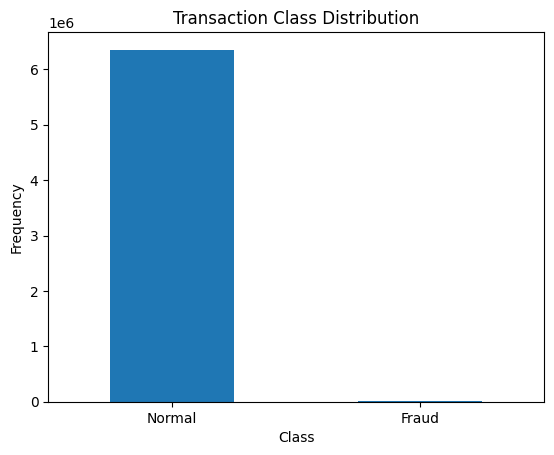

In [4]:
count_classes = pd.value_counts(df['isFraud'], sort = True)
LABELS = ["Normal", "Fraud"]
count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [5]:

fraud = df[df['isFraud']==1]

normal = df[df['isFraud']==0]

In [6]:

print(fraud.shape,normal.shape)

(8213, 11) (6354407, 11)


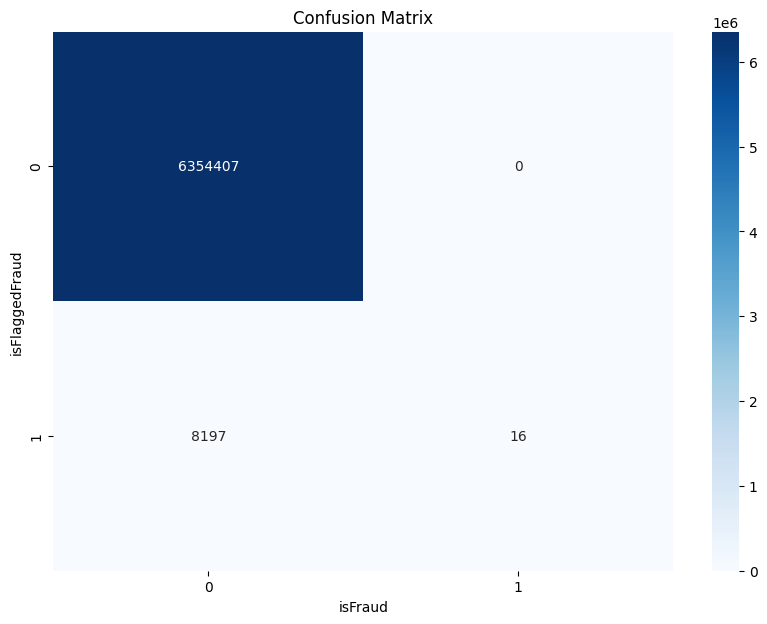

In [7]:
cm = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('isFraud')
plt.ylabel('isFlaggedFraud')
plt.title('Confusion Matrix')
plt.show()

In [8]:
for i in df.columns:
    print(df[i].value_counts())

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
oldbalanceOrg
0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
34577.49           1
184929.21   

In [9]:
remove=['nameDest','nameOrig','nameDest']#We are removing these values because they are in String format and their is no pattern or classes.

In [11]:
df['type'], _ = pd.factorize(df['type'])#Converting catagorical data to numerical.


(8213, 9) (6354407, 9)


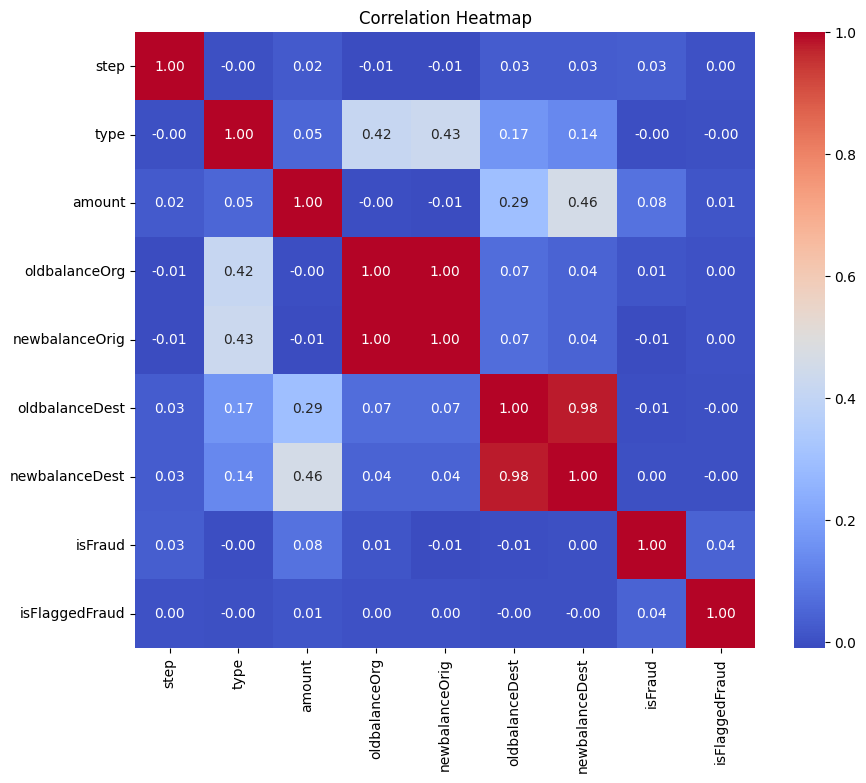

In [15]:
fraud = df[df['isFraud']==1]

normal = df[df['isFraud']==0]

print(fraud.shape,normal.shape)
df = df.drop(columns=remove)

df['type'], _ = pd.factorize(df['type'])
corr = df.corr()
# Generate a heatmap to get correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
mf=df
def correlation(dataset, threshold):#computes the most optimistic features.
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
features=correlation(df,0.5)
df=df.drop(columns=['oldbalanceOrg','oldbalanceDest'])#Their is high correlation amoung 'oldbalanceOrg','oldbalanceDest' and newbalanceOrig,newbalanceDest
features

In [18]:
y=df.iloc[:,-2]
x=df.drop(columns='isFraud')
os = RandomOverSampler(sampling_strategy=0.75)# WE are using Oversampling
X,Y=os.fit_resample(x,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(Y)))


The number of classes before fit Counter({0: 6354407, 1: 8213})
The number of classes after fit Counter({0: 6354407, 1: 4765805})


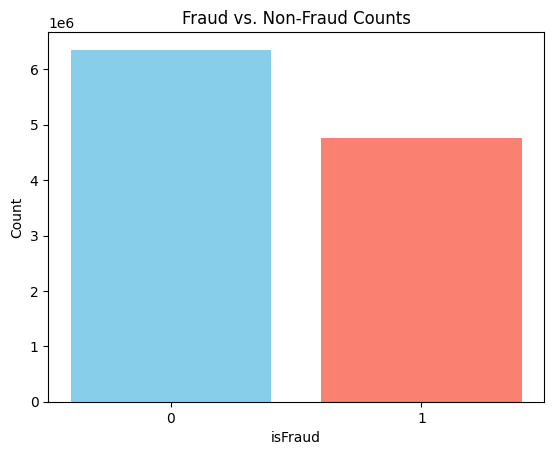

In [19]:
fraud_counts = Y.value_counts()

plt.bar(['0', '1'], fraud_counts, color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.title('Fraud vs. Non-Fraud Counts')

# Show the chart
plt.show()

In [20]:

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=42)
# We need to perform data normalization using StandardScaler module
scalar=StandardScaler()
xstandtrain=scalar.fit_transform(xtrain)
xstandtest=scalar.transform(xtest)
xmaintrain=scalar.transform(X)

In [21]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Prepare LightGBM dataset
lgb_train = lgb.Dataset(xstandtrain, ytrain)
lgb_eval = lgb.Dataset(xstandtest, ytest, reference=lgb_train)

# LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Define models
models = {
    'LightGBM': lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss', num_leaves=31, learning_rate=0.05, feature_fraction=0.9),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Logistic Regression': LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear'),
    'XGB': xgb.XGBClassifier(objective="binary:logistic", n_estimators=100, max_depth=3, learning_rate=0.1),
    'ADABOOST': AdaBoostClassifier()
}

# K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
classification_reports = {}

for name, model in models.items():
    if name == 'LightGBM':
        gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_eval, callbacks=[lgb.early_stopping(stopping_rounds=10)])
        y_pred = gbm.predict(xstandtest, num_iteration=gbm.best_iteration)
        y_pred = [1 if x > 0.5 else 0 for x in y_pred]
        report = classification_report(ytest, y_pred, output_dict=True)
        classification_reports[name] = report
        print(f'LightGBM Accuracy: {report["accuracy"]}')
        print(confusion_matrix(ytest, y_pred))
    else:
        cv_scores = cross_val_score(model, xstandtrain, ytrain, cv=kfold, scoring='accuracy')
        model.fit(xstandtrain, ytrain)
        print(f'{name} model fitted.')
        print(f"Cross-validation scores: {cv_scores}")
        print(f"Average cross-validation score: {cv_scores.mean()}")
        y_pred = model.predict(xtest)
        report = classification_report(ytest, y_pred, output_dict=True)
        classification_reports[name] = report
        print(f"Model: {name}")
        print(report)
        print("\n")

# Print classification reports
for model_name, report in classification_reports.items():
    print(f"Classification Report for {model_name}:")
    print(report)
    print("\n")


[LightGBM] [Info] Number of positive: 3574571, number of negative: 4765588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 8340159, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.428597 -> initscore=-0.287576
[LightGBM] [Info] Start training from score -0.287576
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.130316
LightGBM Accuracy: 0.9471841004470059
[[1544827   43992]
 [ 102839 1088395]]
Random Forest model fitted.
Cross-validation scores: [0.93952694 0.9396972  0.93952094 0.93969061 0.93968577]
Average cross-validation score: 0.9396242925418425


C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_class

Model: Random Forest
{'0': {'precision': 0.5715067302673726, 'recall': 1.0, 'f1-score': 0.7273360263244151, 'support': 1588819.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1191234.0}, 'accuracy': 0.5715067302673726, 'macro avg': {'precision': 0.2857533651336863, 'recall': 0.5, 'f1-score': 0.36366801316220754, 'support': 2780053.0}, 'weighted avg': {'precision': 0.3266199427409034, 'recall': 0.5715067302673726, 'f1-score': 0.4156774342103301, 'support': 2780053.0}}


Decision Tree model fitted.
Cross-validation scores: [0.93970559 0.93975415 0.93966003 0.93968161 0.9397811 ]
Average cross-validation score: 0.9397164970193732


C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_class

Model: Decision Tree
{'0': {'precision': 0.5715067302673726, 'recall': 1.0, 'f1-score': 0.7273360263244151, 'support': 1588819.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1191234.0}, 'accuracy': 0.5715067302673726, 'macro avg': {'precision': 0.2857533651336863, 'recall': 0.5, 'f1-score': 0.36366801316220754, 'support': 2780053.0}, 'weighted avg': {'precision': 0.3266199427409034, 'recall': 0.5715067302673726, 'f1-score': 0.4156774342103301, 'support': 2780053.0}}


Logistic Regression model fitted.
Cross-validation scores: [0.80754206 0.80779505 0.80764458 0.80775129 0.80829673]
Average cross-validation score: 0.8078059423676198


C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Model: Logistic Regression
{'0': {'precision': 0.8622520891781963, 'recall': 0.5255740269974113, 'f1-score': 0.6530750466710099, 'support': 1588819.0}, '1': {'precision': 0.5839187242287247, 'recall': 0.8880144455245569, 'f1-score': 0.7045540827295723, 'support': 1191234.0}, 'accuracy': 0.6808773070153699, 'macro avg': {'precision': 0.7230854067034604, 'recall': 0.706794236260984, 'f1-score': 0.6788145647002911, 'support': 2780053.0}, 'weighted avg': {'precision': 0.7429881155553124, 'recall': 0.6808773070153699, 'f1-score': 0.6751334671544271, 'support': 2780053.0}}


XGB model fitted.
Cross-validation scores: [0.93663131 0.93631357 0.9366439  0.93648443 0.93731292]
Average cross-validation score: 0.9366772264936063
Model: XGB
{'0': {'precision': 0.7094835982546361, 'recall': 0.9169590746334226, 'f1-score': 0.7999881392289785, 'support': 1588819.0}, '1': {'precision': 0.8184219109759941, 'recall': 0.49921006284239705, 'f1-score': 0.6201495739754005, 'support': 1191234.0}, 'accuracy': 

C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

ADABOOST model fitted.
Cross-validation scores: [0.92829094 0.9290763  0.9285877  0.92825497 0.92830829]
Average cross-validation score: 0.9285036412141118


C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Model: ADABOOST
{'0': {'precision': 0.46877183750554646, 'recall': 0.6616115492073043, 'f1-score': 0.5487427810465244, 'support': 1588819.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1191234.0}, 'accuracy': 0.3781154531945974, 'macro avg': {'precision': 0.23438591875277323, 'recall': 0.3308057746036521, 'f1-score': 0.2743713905232622, 'support': 2780053.0}, 'weighted avg': {'precision': 0.26790626009422297, 'recall': 0.3781154531945974, 'f1-score': 0.3136101925537239, 'support': 2780053.0}}


Classification Report for LightGBM:
{'0': {'precision': 0.9375850445417943, 'recall': 0.972311509366391, 'f1-score': 0.9546325720650645, 'support': 1588819.0}, '1': {'precision': 0.9611510905723927, 'recall': 0.913670194101243, 'f1-score': 0.9368094022217909, 'support': 1191234.0}, 'accuracy': 0.9471841004470059, 'macro avg': {'precision': 0.9493680675570935, 'recall': 0.942990851733817, 'f1-score': 0.9457209871434277, 'support': 2780053.0}, 'weighted avg': {'precision': 

##### 

In [22]:
import pickle
for name, model in models.items():
    filename = f"{name}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"{name} model saved to {filename}")

LightGBM model saved to LightGBM_model.pkl
Random Forest model saved to Random Forest_model.pkl
Decision Tree model saved to Decision Tree_model.pkl
Logistic Regression model saved to Logistic Regression_model.pkl
XGB model saved to XGB_model.pkl
ADABOOST model saved to ADABOOST_model.pkl


[LightGBM] [Info] Number of positive: 3574571, number of negative: 4765588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.174839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 8340159, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.428597 -> initscore=-0.287576
[LightGBM] [Info] Start training from score -0.287576
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.130316


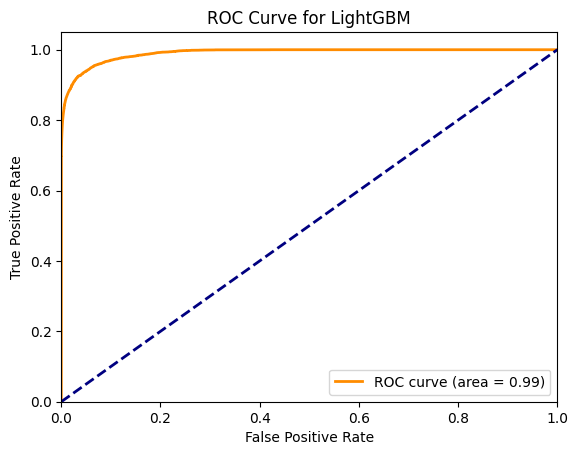

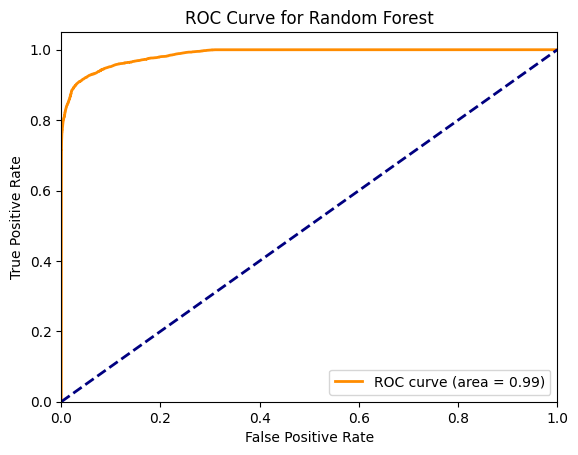

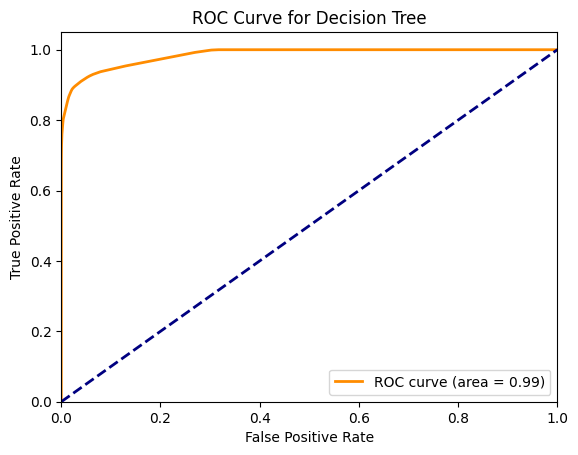

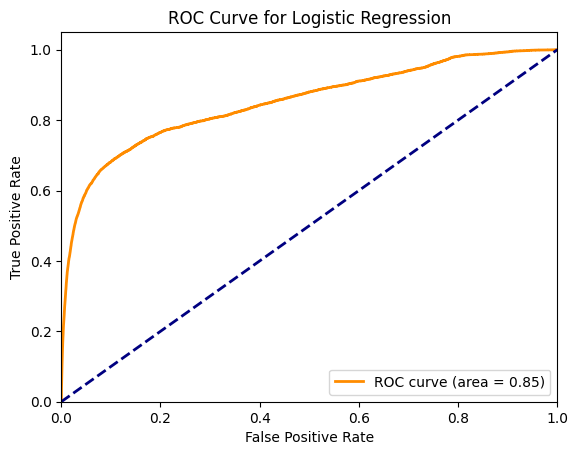

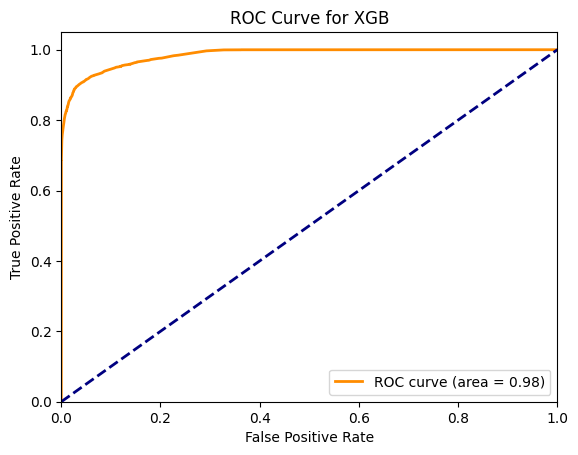

C:\Users\manuh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


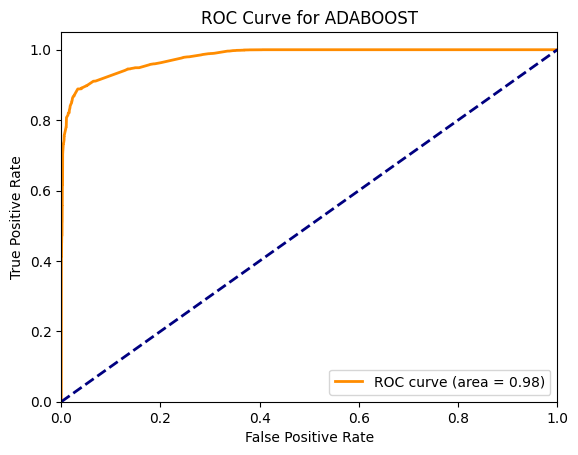

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit models and perform cross-validation
for name, model in models.items():
    if name == 'LightGBM':
        lgb_train = lgb.Dataset(xstandtrain, ytrain)
        lgb_eval = lgb.Dataset(xstandtest, ytest, reference=lgb_train)
        gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_eval, callbacks=[lgb.early_stopping(stopping_rounds=10)])
        y_proba = gbm.predict(xstandtest, num_iteration=gbm.best_iteration)
    else:
        model.fit(xstandtrain, ytrain)
        y_proba = model.predict_proba(xstandtest)[:, 1]  # Probability of class '1'

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(ytest, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()


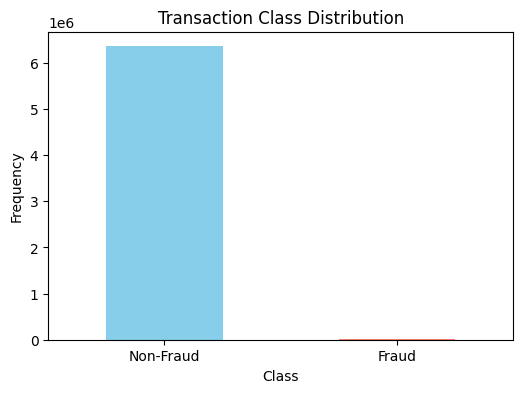

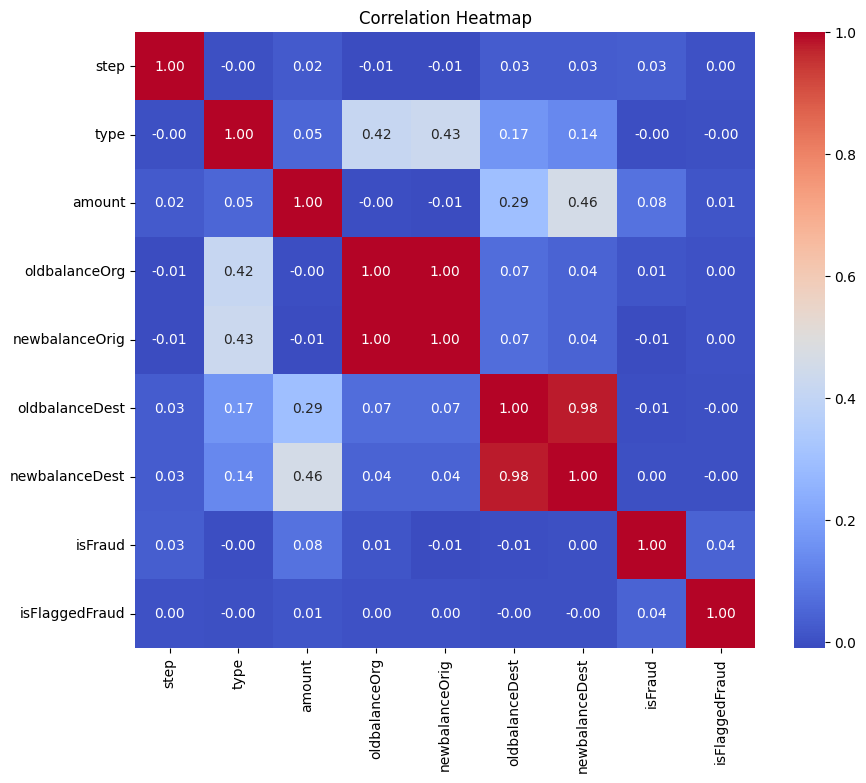

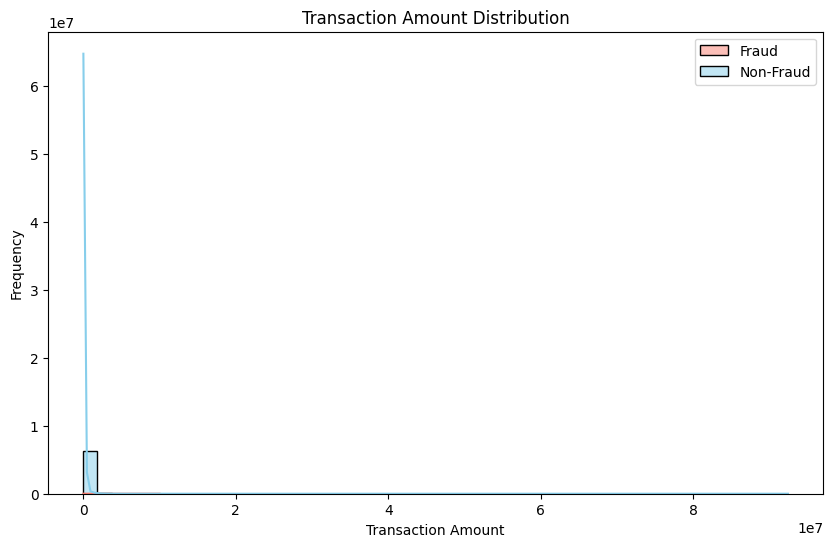

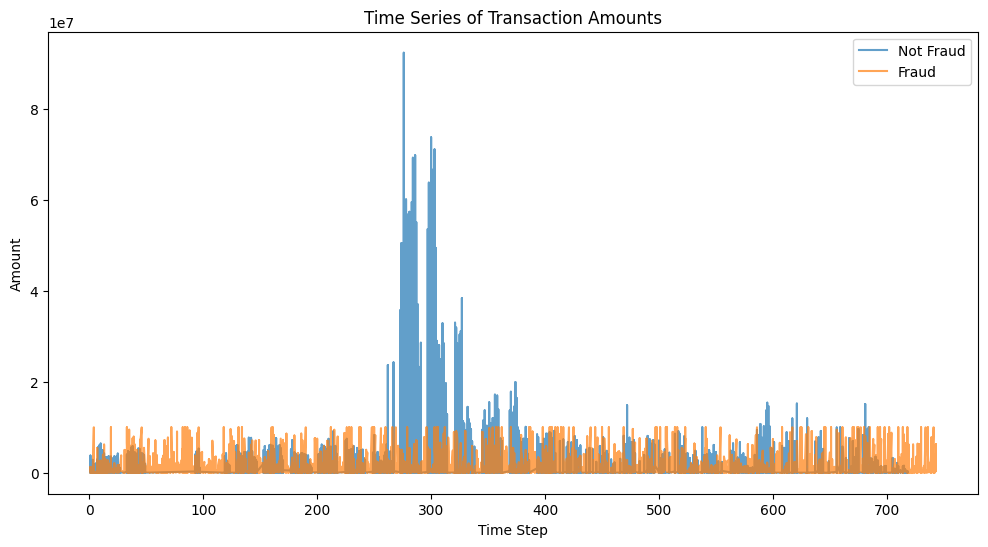

In [24]:
#Data Vizuatization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
mf = pd.read_csv('Fraud.csv')
remove=['nameDest','nameOrig','nameDest']
mf = mf.drop(columns=remove)
mf['type'], _ = pd.factorize(df['type'])
corr = df.corr()

# Plot the distribution of the target variable 'isFraud'
plt.figure(figsize=(6, 4))
mf['isFraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Transaction Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
corr = mf.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot the distribution of transaction amounts for fraud and non-fraud transactions
plt.figure(figsize=(10, 6))
sns.histplot(mf[mf['isFraud'] == 1]['amount'], bins=50, color='salmon', label='Fraud', kde=True)
sns.histplot(mf[mf['isFraud'] == 0]['amount'], bins=50, color='skyblue', label='Non-Fraud', kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Time series analysis (if 'step' represents time)
# Assuming 'step' represents some form of time sequence
# Check if 'step' column exists before setting it as index
if 'step' in mf.columns:
    mf.set_index('step', inplace=True)
    plt.figure(figsize=(12, 6))
    mf[mf['isFraud'] == 0]['amount'].plot(label='Not Fraud', alpha=0.7)
    mf[mf['isFraud'] == 1]['amount'].plot(label='Fraud', alpha=0.7)
    plt.title('Time Series of Transaction Amounts')
    plt.xlabel('Time Step')
    plt.ylabel('Amount')
    plt.legend()
    plt.show()
else:
    print("Column 'step' not found in DataFrame. Cannot perform time series analysis.")
    # Consider creating or loading a 'step' column if needed for time series analysis

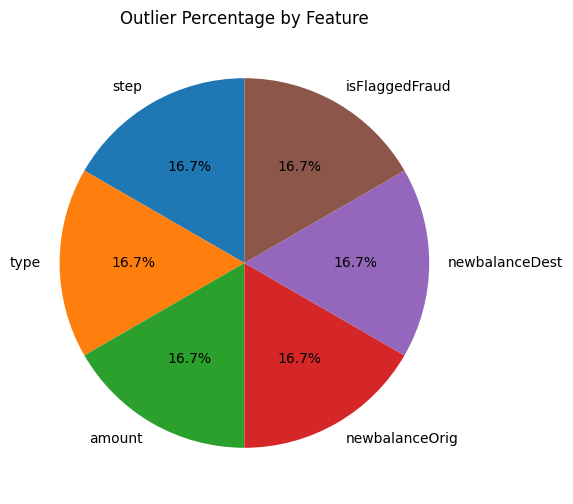

In [25]:
# outlier detection
from sklearn.ensemble import IsolationForest
# Create Isolation Forest model
model = IsolationForest(contamination=0.01)  #

# Fit the model
model.fit(xmaintrain)  

# Predict outliers
outliers = model.predict(xmaintrain)
outlier_percentages = {}
for i, column in enumerate(X.columns):
    feature_values = xmaintrain[:, i]
    feature_outliers = feature_values[outliers == -1]
    percentage = (len(feature_outliers) / len(feature_values)) * 100
    outlier_percentages[column] = percentage
plt.figure(figsize=(10, 6))
plt.pie(outlier_percentages.values(), labels=outlier_percentages.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Outlier Percentage by Feature')
plt.show()

In [27]:
#missing value and multicollinearity
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Missing Values
# Count missing values
print(mf.isnull().sum())

# Impute missing values (example with mean imputation)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(mf))
df_imputed.columns = mf.columns


# 2. Multicollinearity
# Calculate VIF for numerical features
X = df[['amount', 'newbalanceOrig', 'newbalanceDest']]  # Replace with your numerical features
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
#VIF (Variance Inflation Factor): 
#A measure of how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value above 10 indicates high multicollinearity.
#In this case, all VIF values are below 10, indicating that multicollinearity is not a significant issue for these features.


type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
          feature       VIF
0          amount  1.347742
1  newbalanceOrig  1.016460
2  newbalanceDest  1.362513


In [28]:
for model_name, report in classification_reports.items():#Classification report of all the models
    print(f"Classification Report for {model_name}:")
    print(report)
    print("\n")

Classification Report for LightGBM:
{'0': {'precision': 0.9375850445417943, 'recall': 0.972311509366391, 'f1-score': 0.9546325720650645, 'support': 1588819.0}, '1': {'precision': 0.9611510905723927, 'recall': 0.913670194101243, 'f1-score': 0.9368094022217909, 'support': 1191234.0}, 'accuracy': 0.9471841004470059, 'macro avg': {'precision': 0.9493680675570935, 'recall': 0.942990851733817, 'f1-score': 0.9457209871434277, 'support': 2780053.0}, 'weighted avg': {'precision': 0.9476829366601149, 'recall': 0.9471841004470059, 'f1-score': 0.9469954637419202, 'support': 2780053.0}}


Classification Report for Random Forest:
{'0': {'precision': 0.5715067302673726, 'recall': 1.0, 'f1-score': 0.7273360263244151, 'support': 1588819.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1191234.0}, 'accuracy': 0.5715067302673726, 'macro avg': {'precision': 0.2857533651336863, 'recall': 0.5, 'f1-score': 0.36366801316220754, 'support': 2780053.0}, 'weighted avg': {'precision': 0.32661